## Segment a sparse 3D image with a single material component  

The goal of this notebook is to develop a 3D segmentation algorithm that improves segmentation where features are detected.

**Data:** AM parts from Xuan Zhang. 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import sys
import time
import seaborn as sns
import pandas as pd

from tomo_encoders import Patches
from params import model_path, get_model_params
from datasets import dataset_names, get_datasets
from tomo_encoders.rw_utils.data_pairs import load_dataset_pairs
from tomo_encoders.neural_nets.surface_segmenter import SurfaceSegmenter
from tomo_encoders.misc import viewer
from tomo_encoders import DataFile
from tomo_encoders.misc.img_stats import calc_jac_acc

In [5]:
datasets = get_datasets(dataset_names[:], test_binning = 1)

In [6]:
datasets

{'mli_L206_HT_650_L3': {'fpath_X': '/data02/MyArchive/tomo_datasets/AM_part_Xuan/data/mli_L206_HT_650_L3_rec_1x1_uint16_tiff',
  'fpath_Y': '/data02/MyArchive/tomo_datasets/AM_part_Xuan/seg_data/mli_L206_HT_650_L3/mli_L206_HT_650_L3_GT',
  'data_tag_X': 'data',
  'data_tag_Y': 'SEG',
  's_crops': (slice(100, -100, 1),
   slice(None, None, 1),
   slice(None, None, 1))},
 'AM316_L205_fs_tomo_L5': {'fpath_X': '/data02/MyArchive/tomo_datasets/AM_part_Xuan/data/AM316_L205_fs_tomo_L5_rec_1x1_uint16_tiff',
  'fpath_Y': '/data02/MyArchive/tomo_datasets/AM_part_Xuan/seg_data/AM316_L205_fs_tomo_L5/AM316_L205_fs_tomo_L5_GT',
  'data_tag_X': 'data',
  'data_tag_Y': 'SEG',
  's_crops': (slice(50, -50, 1), slice(None, None, 1), slice(None, None, 1))}}

In [7]:
ds1 = DataFile('/data02/MyArchive/tomo_datasets/AM_part_Xuan/data/AM316_L205_fs_tomo_L5_rec_1x1_uint16_tiff', tiff = True)
ds2 = DataFile('/data02/MyArchive/tomo_datasets/AM_part_Xuan/data/mli_L206_HT_650_L3_rec_1x1_uint16_tiff', tiff = True)


##################################################
Found existing tiff folder: AM316_L205_fs_tomo_L5_rec_1x1_uint16_tiff
Dataset shape: (900, 5200, 5200)

##################################################
Found existing tiff folder: mli_L206_HT_650_L3_rec_1x1_uint16_tiff
Dataset shape: (1102, 4200, 4200)


In [9]:
img1 = ds1.read_slice(axis = 0, slice_idx = 450)
img2 = ds2.read_slice(axis = 0, slice_idx = 551)

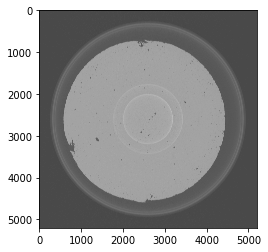

In [10]:
plt.imshow(img1, cmap = 'gray')

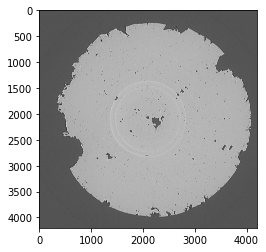

In [11]:
plt.imshow(img2, cmap = 'gray')

In [13]:
ds1 = DataFile('/data02/MyArchive/tomo_datasets/AM_part_Xuan/seg_data/AM316_L205_fs_tomo_L5/AM316_L205_fs_tomo_L5_GT', tiff = True)
ds2 = DataFile('/data02/MyArchive/tomo_datasets/AM_part_Xuan/seg_data/mli_L206_HT_650_L3/mli_L206_HT_650_L3_GT', tiff = True)


##################################################
Found existing tiff folder: AM316_L205_fs_tomo_L5_GT
Dataset shape: (900, 5200, 5200)

##################################################
Found existing tiff folder: mli_L206_HT_650_L3_GT
Dataset shape: (1102, 4200, 4200)


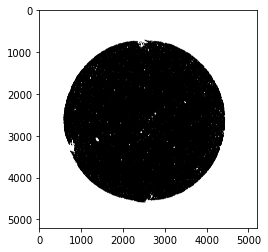

In [15]:
plt.imshow(ds1.read_slice(axis = 0, slice_idx = 450), cmap = 'gray')

In [ ]:
plt.imshow(ds2.read_slice(axis))